In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score, \
roc_auc_score, auc, plot_confusion_matrix, precision_recall_curve, classification_report, fbeta_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import NearMiss, EditedNearestNeighbours
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import warnings
warnings.filterwarnings('ignore')

c:\Users\Asus\ML_Projects\Machine_Learning_Project_2\venv\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
df = pd.read_excel(r"C:\Users\Asus\Downloads\default of credit card clients.xls", header = 1)

In [4]:
df.drop(columns='ID', axis = 1, inplace=True)

In [5]:
df1 = df.copy()

In [6]:
df1.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [8]:
df1.shape

(30000, 24)

In [9]:
df1.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [10]:
target_column = 'default payment next month'

In [11]:
num = [i for i in df1.columns if len(df1[i].unique()) > 15 ]

In [12]:
cat = [i for i in df1.columns if i!= 'default payment next month' and len(df1[i].unique()) < 15 ]

In [13]:
cat

['SEX',
 'EDUCATION',
 'MARRIAGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6']

In [14]:
for i in cat : 
    print(i, ":", df1[i].unique())

SEX : [2 1]
EDUCATION : [2 1 3 5 4 6 0]
MARRIAGE : [1 2 3 0]
PAY_0 : [ 2 -1  0 -2  1  3  4  8  7  5  6]
PAY_2 : [ 2  0 -1 -2  3  5  7  4  1  6  8]
PAY_3 : [-1  0  2 -2  3  4  6  7  1  5  8]
PAY_4 : [-1  0 -2  2  3  4  5  7  6  1  8]
PAY_5 : [-2  0 -1  2  3  5  4  7  8  6]
PAY_6 : [-2  2  0 -1  3  6  4  7  8  5]


In [15]:
df1.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

There is no null values in the dataset. But some unknown data in the dataframe we have to replace them.

In [16]:
condition = (df1['EDUCATION'] == 5) | (df1['EDUCATION'] == 6) | (df1['EDUCATION'] == 0)

df1.loc[condition, 'EDUCATION'] = 3

In [17]:
df1.loc[(df1['MARRIAGE'] == 0), 'MARRIAGE'] = 3

In [18]:
for i in ['PAY_0', 'PAY_2', "PAY_3", 'PAY_4', 'PAY_5', 'PAY_6']:
    df1.loc[(df1[i] < 0), i] = 0

In [19]:
for i in cat:
    print(df1[i].unique())

[2 1]
[2 1 3 4]
[1 2 3]
[2 0 1 3 4 8 7 5 6]
[2 0 3 5 7 4 1 6 8]
[0 2 3 4 6 7 1 5 8]
[0 2 3 4 5 7 6 1 8]
[0 2 3 5 4 7 8 6]
[0 2 3 6 4 7 8 5]


# EDA

Target Variable

([<matplotlib.patches.Wedge at 0x2710664cfd0>,
 [Text(-0.8449152390547128, 0.704356613380692, 'Non Defaulter'),
  Text(0.8449152720280249, -0.7043565738273541, 'Defaulter')],
 [Text(-0.46086285766620694, 0.38419451638946833, '77.88'),
  Text(0.46086287565164985, -0.38419449481492035, '22.12')])

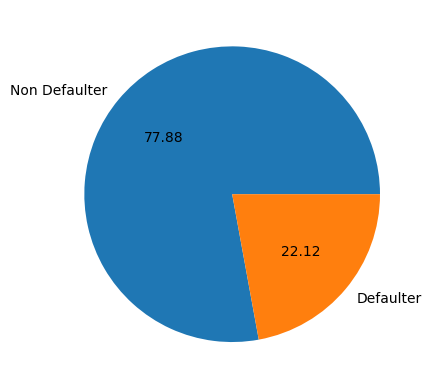

In [20]:
plt.pie(df1['default payment next month'].value_counts(), labels = ['Non Defaulter', 'Defaulter'], autopct = '%.2f')

This is imbalanced data set. Because Non Defaulters are more than Defaulters

Numerical Data 

<AxesSubplot:xlabel='default payment next month', ylabel='PAY_AMT1'>

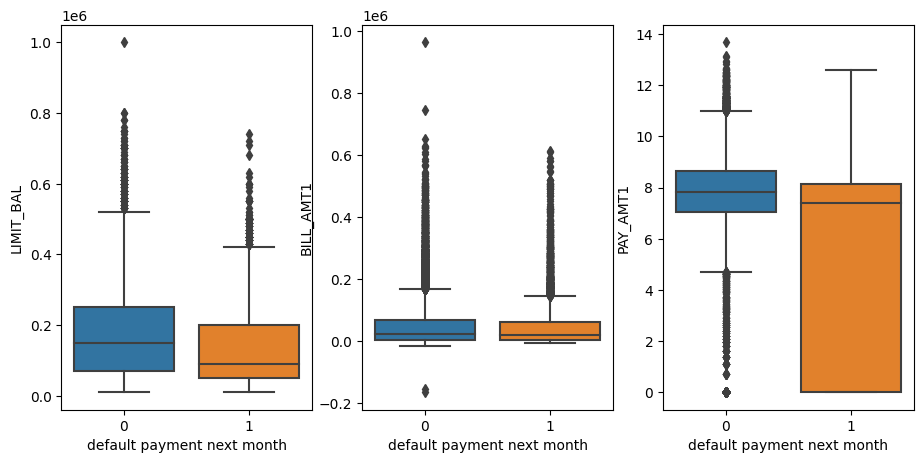

In [21]:
plt.figure(figsize=(11, 5))
plt.subplot(1,3,1)
sns.boxplot(y=df1['LIMIT_BAL'], x=df1['default payment next month'])
plt.subplot(1,3,2)
sns.boxplot(y=df1['BILL_AMT1'], x=df1['default payment next month'])
plt.subplot(1,3,3)
sns.boxplot(y=np.log1p(df1['PAY_AMT1']), x=df1['default payment next month'])

<AxesSubplot:xlabel='default payment next month', ylabel='PAY_AMT2'>

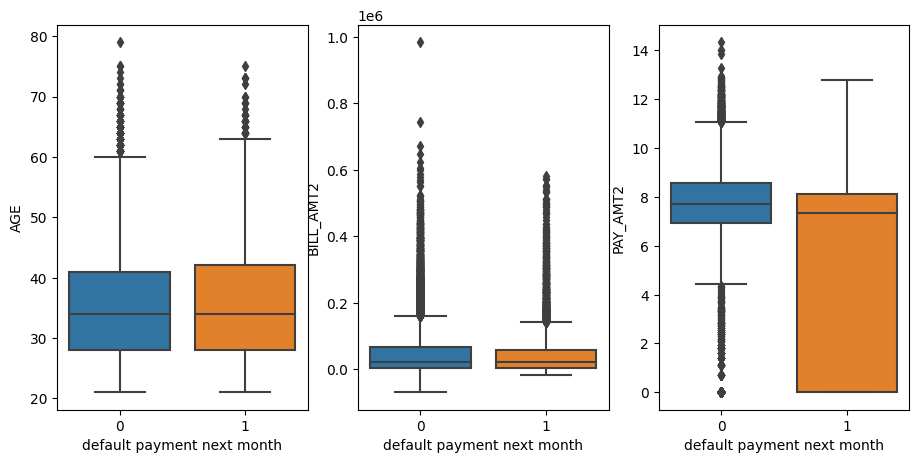

In [22]:
plt.figure(figsize=(11, 5))
plt.subplot(1,3,1)
sns.boxplot(y=df1['AGE'], x=df1['default payment next month'])
plt.subplot(1,3,2)
sns.boxplot(y=df1['BILL_AMT2'], x=df1['default payment next month'])
plt.subplot(1,3,3)
sns.boxplot(y=np.log1p(df1['PAY_AMT2']), x=df1['default payment next month'])

* All the numerical features are not normally distributed
* But the bill amount variables and pay amount varibales follows the same pattern respectively.

Categorical data

In [23]:
labels = [['Defaulter', 'Male'], ['Defaulter', 'Female']]

<AxesSubplot:ylabel='default payment next month'>

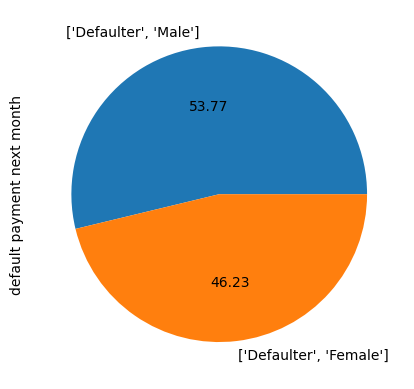

In [24]:
df1.groupby(['SEX'])['default payment next month'].mean().plot.pie(labels =labels, autopct = '%.2f')

Males are more defaulters when compared to men

In [25]:
labels = [['Defaulter', 'Married'], ['Defaulter', 'Single'], ['Defaulter', 'Others']]

<AxesSubplot:ylabel='default payment next month'>

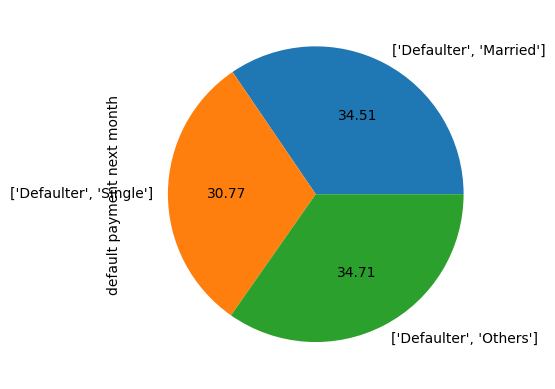

In [26]:
df1.groupby(['MARRIAGE'])['default payment next month'].mean().plot.pie(labels =labels, autopct = '%.2f')

Others are more defaulters when compared to the remaining all.

In [27]:
labels = [['Defaulter', 'Graduate School'], ['Defaulter', 'University'], ['Defaulter', 'High School'], ['Defaulter', 'Others']]

<AxesSubplot:ylabel='default payment next month'>

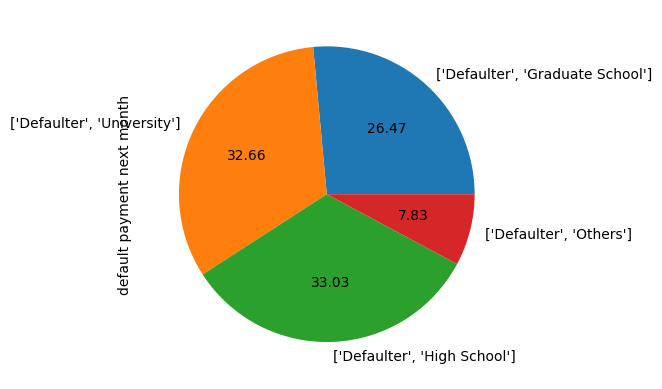

In [28]:
df1.groupby(['EDUCATION'])['default payment next month'].mean().plot.pie(labels =labels, autopct = '%.2f')

High School members have high chance of defaulting

In [29]:
labels = [['Defaulter', 'Pay Duly'], ['Defaulter', 'payment delay for one month'], ['Defaulter', 'payment delay for two months'], 
          ['Defaulter', 'payment delay for three months'], ['Defaulter', 'payment delay for four months'],
         ['Defaulter', 'payment delay for five months'], ['Defaulter', 'payment delay for six months'],
         ['Defaulter', 'payment delay for seven months'], ['Defaulter', 'payment delay for eight months']]

<AxesSubplot:ylabel='default payment next month'>

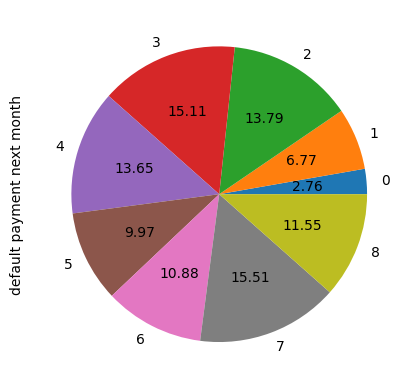

In [30]:
df1.groupby(['PAY_0'])['default payment next month'].mean().plot.pie(autopct = '%.2f')

If one month is delayed to repay, then the chance of defaulting is increasing significantly, remaining pay features are follws the same pattern

<AxesSubplot:ylabel='default payment next month'>

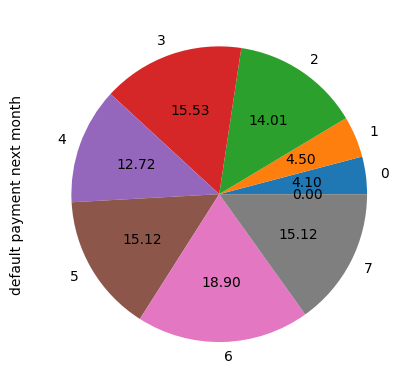

In [31]:
df1.groupby(['PAY_2'])['default payment next month'].mean().plot.pie(autopct = '%.2f')

<AxesSubplot:ylabel='default payment next month'>

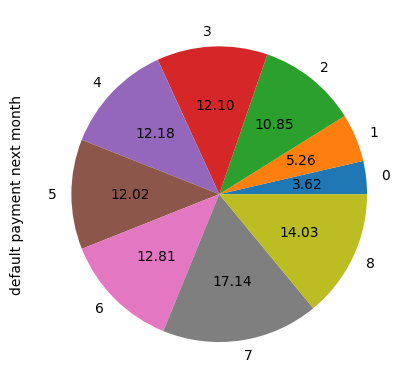

In [32]:
df1.groupby(['PAY_3'])['default payment next month'].mean().plot.pie(autopct = '%.2f')

<AxesSubplot:ylabel='default payment next month'>

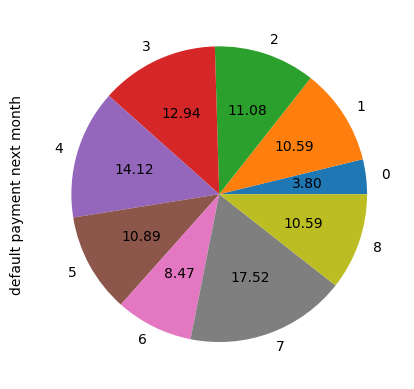

In [33]:
df1.groupby(['PAY_4'])['default payment next month'].mean().plot.pie(autopct = '%.2f')

<AxesSubplot:ylabel='default payment next month'>

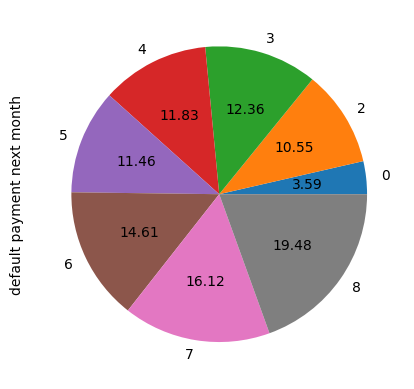

In [34]:
df1.groupby(['PAY_5'])['default payment next month'].mean().plot.pie(autopct = '%.2f')

<AxesSubplot:ylabel='default payment next month'>

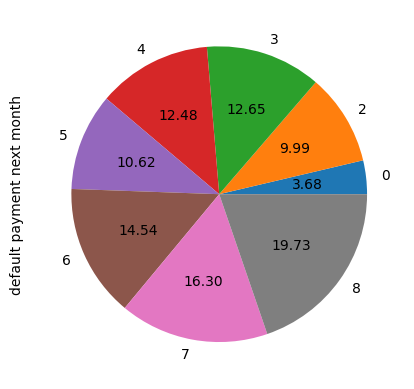

In [35]:
df1.groupby(['PAY_6'])['default payment next month'].mean().plot.pie(autopct = '%.2f')

But here PAY_2, PAY_3, PAY_4 features have same pattern and PAY_5, PAY_6 features have same pattern

# Data Preprocessing

Each and every numerical feature has extreme outliers to remove them here apply power transformation scaling to all the numerical features

In [36]:
X, y = df1.iloc[:, :-1], df1.iloc[:, -1]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
X_train

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
28465,240000,2,1,1,40,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27622,50000,2,1,2,23,0,0,0,0,0,...,2299,4800,9810,660,2548,2321,4800,9810,660,2980
28376,50000,2,2,1,36,2,2,2,2,0,...,49125,47956,43578,35126,0,4700,0,2004,3500,0
10917,200000,2,3,1,54,6,5,4,3,2,...,104686,102549,101400,0,0,0,0,0,0,0
27234,240000,1,1,1,35,0,0,0,0,0,...,21790,17102,13367,22659,2017,21817,1120,13434,22772,22820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,50000,1,2,2,32,0,0,0,0,0,...,55739,55957,29238,6119,2000,3000,1591,72,1134,73421
5390,200000,1,1,2,37,2,2,2,2,2,...,168386,164182,169029,172084,13500,6000,0,7500,6000,4000
860,50000,1,1,2,26,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15795,70000,2,2,2,25,0,0,0,0,2,...,51152,35122,28633,28039,3000,2000,4500,1200,0,1200


In [39]:
transformer = ColumnTransformer([('Transformed', PowerTransformer(), num)], remainder='passthrough')

In [40]:
transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('Transformed', PowerTransformer(),
                                 ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2',
                                  'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
                                  'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
                                  'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
                                  'PAY_AMT6'])])

In [41]:
columns = num + cat

In [42]:
X_train = pd.DataFrame(transformer.transform(X_train), columns = columns)
X_test = pd.DataFrame(transformer.transform(X_test), columns = columns)

Balancing Data

<AxesSubplot:>

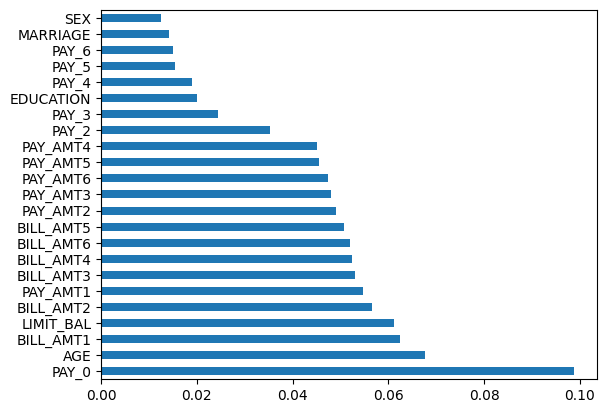

In [43]:
model=RandomForestClassifier()
model.fit(X_train,y_train)

fi=pd.Series(model.feature_importances_,index=X_train.columns).sort_values(ascending=False)
fi.plot(kind='barh')

In [44]:
fs=['LIMIT_BAL', 'PAY_0','PAY_2','PAY_3','BILL_AMT1','BILL_AMT2','BILL_AMT3','PAY_AMT1','PAY_AMT2','PAY_AMT3']

X_train=X_train[fs]
X_test=X_test[fs]

In [45]:
param_grid={'n_estimators':range(100,150,10),
            'max_depth':range(3,8),
            'min_samples_split':range(2,10,2)}

cv=StratifiedKFold(n_splits=5)
classifier=GridSearchCV(RandomForestClassifier(),param_grid,n_jobs=-1,cv=cv)
classifier.fit(X_train,y_train)
ytrain_pred = classifier.predict(X_train)
ytest_pred = classifier.predict(X_test)
print('Precision : \n\tTrain : ', precision_score(ytrain_pred, y_train),"\n\tTest : ", precision_score(ytest_pred, y_test))
print('Recall : \n\tTrain : ', recall_score(ytrain_pred, y_train),"\n\tTest : ", recall_score(ytest_pred, y_test))
print('F1 Score : \n\tTrain : ', f1_score(ytrain_pred, y_train),"\n\tTest : ", f1_score(ytest_pred, y_test))
print('accuracy Score : \n\tTrain : ', accuracy_score(ytrain_pred, y_train),"\n\tTest : ", accuracy_score(ytest_pred, y_test))
print('roc_auc_score :\n\Train : ', roc_auc_score(ytrain_pred, y_train), "\n\tTest : ", roc_auc_score(ytest_pred, y_test))

Precision : 
	Train :  0.3462360992301112 
	Test :  0.3224489795918367
Recall : 
	Train :  0.7079142982072584 
	Test :  0.6847237269772481
F1 Score : 
	Train :  0.46502944133275886 
	Test :  0.4384321886923344
accuracy Score : 
	Train :  0.8226190476190476 
	Test :  0.8201111111111111
roc_auc_score :
\Train :  0.7722759649001343 
	Test :  0.7601531226194895


In [46]:
recall_score(ytrain_pred, y_train) - recall_score(ytest_pred, y_test)

0.023190571230010226

In [47]:
classifier.best_estimator_

RandomForestClassifier(max_depth=4, min_samples_split=4)

In [48]:
confusion_matrix(ytrain_pred, y_train)

array([[15656,  3057],
       [  668,  1619]], dtype=int64)

In [49]:
confusion_matrix(ytest_pred, y_test)

array([[6749, 1328],
       [ 291,  632]], dtype=int64)

In [50]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]
classifier = LogisticRegression()
cv=StratifiedKFold(n_splits=5)
classifier = GridSearchCV(classifier, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
classifier.fit(X_train,y_train)
ytrain_pred = classifier.predict(X_train)
ytest_pred = classifier.predict(X_test)
print('Precision : \n\tTrain : ', precision_score(ytrain_pred, y_train),"\n\tTest : ", precision_score(ytest_pred, y_test))
print('Recall : \n\tTrain : ', recall_score(ytrain_pred, y_train),"\n\tTest : ", recall_score(ytest_pred, y_test))
print('F1 Score : \n\tTrain : ', f1_score(ytrain_pred, y_train),"\n\tTest : ", f1_score(ytest_pred, y_test))
print('accuracy Score : \n\tTrain : ', accuracy_score(ytrain_pred, y_train),"\n\tTest : ", accuracy_score(ytest_pred, y_test))
print('roc_auc_score :\n\Train : ', roc_auc_score(ytrain_pred, y_train), "\n\tTest : ", roc_auc_score(ytest_pred, y_test))

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits
Precision : 
	Train :  0.334901625320787 
	Test :  0.31020408163265306
Recall : 
	Train :  0.6773356401384083 
	Test :  0.6509635974304069
F1 Score : 
	Train :  0.4481969089868345 
	Test :  0.42017968210089846
accuracy Score : 
	Train :  0.8163809523809524 
	Test :  0.8135555555555556
roc_auc_score :
\Train :  0.7554593440418069 
	Test :  0.7416732194937802


In [51]:
recall_score(ytrain_pred, y_train) - recall_score(ytest_pred, y_test)

0.02637204270800142

In [52]:
classifier.best_estimator_

LogisticRegression(C=0.08858667904100823, penalty='l1', solver='liblinear')

In [53]:
confusion_matrix(ytrain_pred, y_train)

array([[15578,  3110],
       [  746,  1566]], dtype=int64)

In [54]:
confusion_matrix(ytest_pred, y_test)

array([[6714, 1352],
       [ 326,  608]], dtype=int64)

In [55]:
param_grid={'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20],
    'learning_rate': [(0.97 + x / 100) for x in range(0, 8)],
    'algorithm': ['SAMME', 'SAMME.R']}

cv=StratifiedKFold(n_splits=5)
classifier=GridSearchCV(AdaBoostClassifier(),param_grid,n_jobs=-1,cv=cv)
classifier.fit(X_train,y_train)
ytrain_pred = classifier.predict(X_train)
ytest_pred = classifier.predict(X_test)
print('Precision : \n\tTrain : ', precision_score(ytrain_pred, y_train),"\n\tTest : ", precision_score(ytest_pred, y_test))
print('Recall : \n\tTrain : ', recall_score(ytrain_pred, y_train),"\n\tTest : ", recall_score(ytest_pred, y_test))
print('F1 Score : \n\tTrain : ', f1_score(ytrain_pred, y_train),"\n\tTest : ", f1_score(ytest_pred, y_test))
print('accuracy Score : \n\tTrain : ', accuracy_score(ytrain_pred, y_train),"\n\tTest : ", accuracy_score(ytest_pred, y_test))
print('roc_auc_score :\n\Train : ', roc_auc_score(ytrain_pred, y_train), "\n\tTest : ", roc_auc_score(ytest_pred, y_test))

Precision : 
	Train :  0.3502994011976048 
	Test :  0.32653061224489793
Recall : 
	Train :  0.6873688627780109 
	Test :  0.6715634837355718
F1 Score : 
	Train :  0.46408839779005523 
	Test :  0.43940954342602123
accuracy Score : 
	Train :  0.8198571428571428 
	Test :  0.8185555555555556
roc_auc_score :
\Train :  0.7620923381408989 
	Test :  0.7537635984603049


In [56]:
recall_score(ytrain_pred, y_train) - recall_score(ytest_pred, y_test)

0.01580537904243906

In [57]:
classifier.best_estimator_

AdaBoostClassifier(algorithm='SAMME', learning_rate=1.04, n_estimators=10)

In [58]:
confusion_matrix(ytrain_pred, y_train)

array([[15579,  3038],
       [  745,  1638]], dtype=int64)

In [59]:
confusion_matrix(ytest_pred, y_test)

array([[6727, 1320],
       [ 313,  640]], dtype=int64)